# PhD Guide Project

*Весенний проект по курсу [«Наука о данных»](http://math-info.hse.ru/s18/y), Совместный бакалавриат ВШЭ-РЭШ, 2018-19 учебный год.*

*Автор работы: Анна Щеткина.*

Добро пожаловать! Этот проект — несколько больших таблиц, связанных с поступлением на PhD. В первой части вы найдете некоторую информацию об университетах, во второй — условия жизни в городах, в которых они расположены, в третьей — сможете выучить слова к GRE с котами-помощниками. 

К сожалению, этот код работает от ретроградного Меркурия и есть вероятность, что он где-то сломается. Это связано с тем, что мы парсим несколько разных сайтов, которые то не работают, то пытаются защититься от парсинга, то еще что-нибудь. Именно из-за веб-скреппинга код кроме того что запускается не всегда, еще и долго работает. Для вашего удобства все основные результаты уже есть в ноутбуке, поэтому вы можете посмотреть как выглядят готовые датафреймы и графики. Также 3 часть (самая интерактивная) может быть запущена отдельно, если вы хотите посмотреть на котов сами.

Далее идет описание всех технологий по критериям, после чего сам проект с комментариями.

## Описание проекта

1. Обработка данных с помощью pandas. Так как весь проект — это создание трех таблиц, вполне естественно, что мы использовали продвинутые возможности pandas. Мы объединяли таблицы, применяли много разных функций к столбцам, нормировали, работали со строками в этих таблицах, сортировали, переименовывали и даже использовали pivot когда считали средние издержки на рисерч.

2. Веб-скреппинг. И снова мы спарсили кучу всего, для чего нам пришлось использовать много разных методов. Selenium мы использовали целых два раза и не только, чтобы зайти на страницу. С его помощью мы скроллили страницу вниз, чтобы загрузить всю нужную нам информацию, вбивали запрос в форму, нажимали enter, искали ссылку по тексту, переходили по ссылке и обратно. BeautifulSoup мы тоже использовали в огромных масштабах почти в каждой ячейке.

3. Работа с REST API (XML/JSON). Существенная часть используемых данных была получена из API DataUSA (через JSON). Нам сначала пришлось воспользоваться атрибутами этого API, чтобы найти локальные индексы интересующих нас университетов и городов, затем применить продвинутый фильтеринг и выкачать все данные в таблицу, которую мы дальше объединяли с нашей с помощью merge, но это уже снова первый пункт. Венцом нетривиального использования API в этом проекте, конечно, являются рандомные коты (тоже с помощью фильтеринга — это видно по url) для изучения слов.

4. Визуализация данных. Для визуализации мы использовали красивые графики в seaborn — barplot и heatmap. Пришлось немного поколдовать над данными (отнормировать и отсортировать), чтобы графики были совсем красивыми, а еще подобрать параметры визуализации для большей наглядности.

5. Математические возможности Python (содержательное использование numpy/scipy, SymPy и т.д. для решения математических задач). Мы все же смогли найти математические задачи в таблице с универами! Когда нормировали, а еще когда считали взвешенные суммы для индексов с помощью скалярного произведения из numpy.

6. Другие технологии (пока не обсуждавшиеся в курсе, но связанные с обработкой данных с помощью Python, R или других языков программирования) — например, телеграм-боты или методы машинного обучения или регулярные выражения или ещё что-нибудь. Мы использовали styler для того, чтобы сделать ссылки в таблице кликабельными, datetime чтобы обрабатывать дату и считать количество дней и средства работы с изображениями, чтобы по url картинка отображалась прямо в юпитере и в цикле.

7. Объём (осмысленных строк кода). Их под двести, точно больше 75.

8. Общее впечатление. Надеюсь, вам понравилось :)

## Часть 1. Университеты

Здесь мы скачиваем список топ-30 PhD программ по экономике по версии US News, а также с помощью википедии, сайта Вышки и API Data USA добавляем немного интересных фактов: ссылку на соответствующий экон департмент, количество нобелевских лауреатов, наших выпускников, кто поступил в эти универы, а также сколько университеты тратят на рисерч.

Импортируем все, что нам понадобится

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 

Этот проект использует селениум chrome. Если у вас его нет, в следующей ячейке поменяйте, пожалуйста, его на свой селениум. Больше нигде менять не нужно.

Сейчас мы с помощью селениума спарсим топ-30 универов с USNews (без него питон парсить не хочет)

In [8]:
list_univs = []
browser = webdriver.Chrome()
ref = 'https://www.usnews.com/best-graduate-schools/top-humanities-schools/economics-rankings'
browser.get(ref)
time.sleep(2)
#на этой странице полная таблица (как вк) доступна только если прокрутить вниз. 
#Прокрутим вниз немного, 20 универов это все же слишком оптимистично
browser.execute_script("window.scrollTo(0, 4000)")
time.sleep(3)
soup = BeautifulSoup(browser.page_source)
table = soup.find('table', class_="TableStacked__Container-u0w2tu-0 geKOYi")
for univ in table.find_all('div', class_="Box-s85n6m5-0 kKdFhD")[:30]:
    list_univs.append([univ["name"], univ.p.text.split(', ')[0], univ.p.text.split(', ')[1], univ.p.text])
df = pd.DataFrame(list_univs, columns = ['University', 'Location', 'State', 'Full Location'])

В следующей ячейке вы можете посмотреть, как сейчас выглядит таблица. Там должно быть 30 универов с указанием города, штата в виде почтового двухбуквенного кода и колонка город + штат.

In [9]:
df

University         Location State  \
0                               Harvard University        Cambridge    MA   
1            Massachusetts Institute of Technology        Cambridge    MA   
2                             Princeton University       Princeton     NJ   
3                              Stanford University         Stanford    CA   
4               University of California--Berkeley         Berkeley    CA   
5                                  Yale University        New Haven    CT   
6                          Northwestern University         Evanston    IL   
7                            University of Chicago          Chicago    IL   
8                              Columbia University         New York    NY   
9                       University of Pennsylvania     Philadelphia    PA   
10                             New York University         New York    NY   
11           University of California--Los Angeles      Los Angeles    CA   
12             University of California--San Diego         La Jolla    CA   
13               University of Michigan--Ann Arbor        Ann Arbor    MI   
14                University of Wisconsin--Madison          Madison    WI   
15                              Cornell University           Ithaca    NY   
16                                 Duke University           Durham    NC   
17            University of Minnesota--Twin Cities      Minneapolis    MN   
18                                Brown University       Providence    RI   
19                      Carnegie Mellon University       Pittsburgh    PA   
20            University of Maryland--College Park     College Park    MD   
21                         University of Rochester        Rochester    NY   
22                               Boston University           Boston    MA   
23                        Johns Hopkins University        Baltimore    MD   
24                                  Boston College    Chestnut Hill    MA   
25  Pennsylvania State University--University Park  University Park    PA   
26                     University of Texas--Austin           Austin    TX   
27              Washington University in St. Louis       St. Louis     MO   
28                       Michigan State University     East Lansing    MI   
29                           Ohio State University         Columbus    OH   

          Full Location  
0         Cambridge, MA  
1         Cambridge, MA  
2        Princeton , NJ  
3          Stanford, CA  
4          Berkeley, CA  
5         New Haven, CT  
6          Evanston, IL  
7           Chicago, IL  
8          New York, NY  
9      Philadelphia, PA  
10         New York, NY  
11      Los Angeles, CA  
12         La Jolla, CA  
13        Ann Arbor, MI  
14          Madison, WI  
15           Ithaca, NY  
16           Durham, NC  
17      Minneapolis, MN  
18       Providence, RI  
19       Pittsburgh, PA  
20     College Park, MD  
21        Rochester, NY  
22           Boston, MA  
23        Baltimore, MD  
24    Chestnut Hill, MA  
25  University Park, PA  
26           Austin, TX  
27       St. Louis , MO  
28     East Lansing, MI  
29         Columbus, OH

Теперь выгрузим ссылки на Econ Departments каждого универа. Для этого нам придется пройти по каждой ссылке и обратно. Это долго, к сожалению, потому что браузеру нужно еще поспать. Выпейте пока чаю.

In [10]:
def get_econ_depart_by_univ(univ):
    a = browser.find_element_by_link_text(univ)
    browser.execute_script("arguments[0].click();", a)
    time.sleep(3)
    soup_depart = BeautifulSoup(browser.page_source)
    depart = (soup_depart.find('a', class_='Anchor-u1fur6-0 efWFsS')['href'])
    browser.back()
    browser.execute_script("window.scrollTo(0, 4000)") 
    time.sleep(3)
    return depart
df['Econ Department'] = df['University'].apply(get_econ_depart_by_univ)

Теперь давайте сделаем таблицу чуть более русскочеловекочитаемой и заменим почтовые коды на полные названия штатов.

In [11]:
#у некоторых универов названия, которые потом не прогуглятся. Давайте это исправим.
df['University'] = df.University.str.replace('--', ', ')
r = requests.get('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States')
dict_states = {}
soup_wiki_states = BeautifulSoup(r.text, 'lxml')
table_wiki_states = soup_wiki_states.find('table')
for tr in table_wiki_states.find_all('tr')[2:]:
    dict_states[tr.find('td').string.rstrip()] = tr.th.a.text+' ('+tr.find_all('td')[1].a.text+')'
df['State'].replace(dict_states, inplace=True)

На многих программах есть наши выпускники. Давайте добавим их имена, чтобы можно было с кем-то связаться и узнать подробнее.

In [12]:
dict_short_names = {'University of California, Los Angeles': 'UCLA', 'University of Wisconsin, Madison' : 'University of Wisconsin', 'University of Minnesota, Twin Cities': 'University of Minnesota', 'Pennsylvania State University, University Park': 'Pennsylvania State University', 'University of Texas, Austin': 'University of Texas'}
def add_short_name(univ):
    if univ in dict_short_names.keys():
        return [univ, dict_short_names[univ]]
    else:
        return [univ, univ]
df['Short names'] = df['University'].apply(add_short_name)
r_alumni = requests.get('https://economics.hse.ru/io/alumniacadem/')
soup_alumni = BeautifulSoup(r_alumni.text, 'lxml')
table_alumni = soup_alumni.find('div', class_='post__text').tbody
def get_alumni_by_univ(short_names):
    s = ''
    for tr in table_alumni.find_all('tr'):
        if (short_names[0] in tr.text) | (short_names[1] in tr.text):
            s += tr.text.split(', ')[0].lstrip() + ', '
    if s == '':
        s = 'You might be the first guy from HSE here!'
    return s.rstrip(', ')
df['Alumni'] = df['Short names'].apply(get_alumni_by_univ)
df.drop(columns = 'Short names', inplace = True)

Еще добавим количество нобелевских лауретов по экономике для каждого университета.

In [13]:
r_nobel = requests.get('https://en.wikipedia.org/wiki/List_of_Nobel_Memorial_Prize_laureates_in_Economics')
soup_nobel = BeautifulSoup(r_nobel.text, 'lxml')
table_nobel = soup_nobel.find('tbody')
def get_nobel_by_univ(univ):
    i = 0
    for tr in table_nobel.find_all('tr')[1:]:
        if univ in tr.find_all('td')[-1].text:
            i+=1
    return i
df['#Nobel Prizes'] = df.University.apply(get_nobel_by_univ)

В API DataUSA есть очень интересные данные. Большинством мы воспользуемся чуть позже, а пока узнаем, сколько каждый из университетов тратит на исследования.

In [14]:
url_attr_univ = requests.get('https://api.datausa.io/attrs/university/')
data_atrrs_univ = pd.DataFrame(url_attr_univ.json()["data"])
df['Name_Problem_Again'] = df.University.str.replace(', ', '-')
df = df.merge(data_atrrs_univ[[4, 17]].rename(columns={4: 'Name_Problem_Again', 17: 'University ID'}), how = 'left', on = 'Name_Problem_Again')
#часть проблемы с именами не решилась, заполним вручную
df['University ID'].fillna(value = {8 : "190150", 25: "214777", 26: "228778", 27: "179867", 29: "204796"}, inplace = True)
r_funding = requests.get('https://api.datausa.io/api/?show=university&required=research_total')
df_funding = pd.DataFrame(r_funding.json()["data"])
new_df_funding = df_funding.pivot(index = 1, columns = 0, values = 2)
new_df_funding['Average Research Expenditure'] = new_df_funding.mean(axis = 1)
df = df.merge(new_df_funding.reset_index().rename(columns={1: 'University ID'})[['University ID', 'Average Research Expenditure']], how = 'left', on = 'University ID')
df.drop(columns = 'Name_Problem_Again', inplace = True)

Здесь будет визуализация фандинга

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

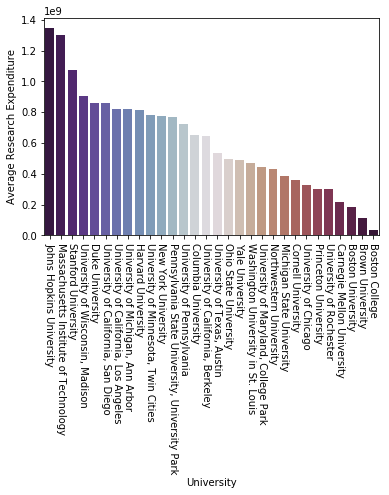

In [15]:
exp_plot = sns.barplot(
    data= df[['University', 'Average Research Expenditure']].sort_values(['Average Research Expenditure'],ascending=False),
    x= 'University',
    y= 'Average Research Expenditure',
    palette = "twilight_shifted")
plt.xticks(rotation=-90)

Теперь можно посмотреть на нашу полную таблицу

In [16]:
df

University         Location  \
0                               Harvard University        Cambridge   
1            Massachusetts Institute of Technology        Cambridge   
2                             Princeton University       Princeton    
3                              Stanford University         Stanford   
4               University of California, Berkeley         Berkeley   
5                                  Yale University        New Haven   
6                          Northwestern University         Evanston   
7                            University of Chicago          Chicago   
8                              Columbia University         New York   
9                       University of Pennsylvania     Philadelphia   
10                             New York University         New York   
11           University of California, Los Angeles      Los Angeles   
12             University of California, San Diego         La Jolla   
13               University of Michigan, Ann Arbor        Ann Arbor   
14                University of Wisconsin, Madison          Madison   
15                              Cornell University           Ithaca   
16                                 Duke University           Durham   
17            University of Minnesota, Twin Cities      Minneapolis   
18                                Brown University       Providence   
19                      Carnegie Mellon University       Pittsburgh   
20            University of Maryland, College Park     College Park   
21                         University of Rochester        Rochester   
22                               Boston University           Boston   
23                        Johns Hopkins University        Baltimore   
24                                  Boston College    Chestnut Hill   
25  Pennsylvania State University, University Park  University Park   
26                     University of Texas, Austin           Austin   
27              Washington University in St. Louis       St. Louis    
28                       Michigan State University     East Lansing   
29                           Ohio State University         Columbus   

                        State        Full Location  \
0      Massachusetts (Boston)        Cambridge, MA   
1      Massachusetts (Boston)        Cambridge, MA   
2        New Jersey (Trenton)       Princeton , NJ   
3     California (Sacramento)         Stanford, CA   
4     California (Sacramento)         Berkeley, CA   
5      Connecticut (Hartford)        New Haven, CT   
6      Illinois (Springfield)         Evanston, IL   
7      Illinois (Springfield)          Chicago, IL   
8           New York (Albany)         New York, NY   
9   Pennsylvania (Harrisburg)     Philadelphia, PA   
10          New York (Albany)         New York, NY   
11    California (Sacramento)      Los Angeles, CA   
12    California (Sacramento)         La Jolla, CA   
13         Michigan (Lansing)        Ann Arbor, MI   
14        Wisconsin (Madison)          Madison, WI   
15          New York (Albany)           Ithaca, NY   
16   North Carolina (Raleigh)           Durham, NC   
17       Minnesota (St. Paul)      Minneapolis, MN   
18  Rhode Island (Providence)       Providence, RI   
19  Pennsylvania (Harrisburg)       Pittsburgh, PA   
20       Maryland (Annapolis)     College Park, MD   
21          New York (Albany)        Rochester, NY   
22     Massachusetts (Boston)           Boston, MA   
23       Maryland (Annapolis)        Baltimore, MD   
24     Massachusetts (Boston)    Chestnut Hill, MA   
25  Pennsylvania (Harrisburg)  University Park, PA   
26             Texas (Austin)           Austin, TX   
27  Missouri (Jefferson City)       St. Louis , MO   
28         Michigan (Lansing)     East Lansing, MI   
29            Ohio (Columbus)         Columbus, OH   

                                      Econ Department  \
0           http://www.economics.harvard.edu/graduate   
1                   http://econ-www.mit.edu/gradu

Добавим немного магии (она проходит по критерию другие технологии, я надеюсь) и сделаем ссылки на экон департменты кликабельными.

In [17]:
def clickable_econ_dep(dep): 
    return f'<a href="{dep}">{dep}</a>'

df.style.format({'Econ Department': clickable_econ_dep})

## Часть 2. Города

А сейчас мы создадим отдельную таблицу с городами, в которых находятся наши универы и соберем разную инфу про них.

In [18]:
df_location = pd.DataFrame(df['Full Location'].unique(), columns = ['City'])
df_location['Full Location'] = df_location.City.replace({'Princeton , NJ':'Princeton, NJ', 'La Jolla, CA':'San Diego, CA', 'Chestnut Hill, MA': 'Boston, MA', 'University Park, PA': 'State College, PA', 'St. Louis , MO': 'St. Louis, MO'})


Время использовать API DataUSA. Сначала нам придется найти внутренний ID каждого города, а потом мы выкачаем разные данные: население, медианный доход, среднее время в пути до работы, долю врачей, смерти в авариях на 100 тысяч человек, траты на здоровье, преступления, индекс доступа к здоровой еде и загрязнение. 

In [19]:
#используя апи DataUSA найдем коды городов
url_attr_loc = requests.get('https://api.datausa.io/attrs/geo/', params = {'sumlevel' : 'place'})
data_atrrs_loc = pd.DataFrame(url_attr_loc.json()["data"]).rename(columns={1:'Full Location', 8:'Location ID'})
df_location = df_location.merge(data_atrrs_loc[['Full Location', 'Location ID']], how='left', on='Full Location')
#скачиваем последние данные по населению -- это 2016 год
for var in ['pop', 'income', 'mean_commute_minutes']:
    r_variables = requests.get('https://api.datausa.io/api/', params = {'show':'geo', 'required' : var, 'sumlevel' : 'place', 'year': 'latest'})
    df_variables = pd.DataFrame(r_variables.json()["data"]).rename(columns={1:'Location ID', 2:var}).drop(columns=0)
    df_location = df_location.merge(df_variables, how = 'left', on = 'Location ID')
#Посмотрим, что у нас с датасетом по здоровью
def CHR_information(city, var):
    r_variables = requests.get('https://api.datausa.io/api/', params = {'show':'geo', 'required' : var, 'year': 'latest', 'geo': city})
    return r_variables.json()["data"][0][2]
for var in ['primary_care_physicians', 'motor_vehicle_crash_deaths', 'health_care_costs', 'violent_crime', 'food_environment_index', 'polution_ppm']:
    df_location[var] = df_location['Location ID'].apply(CHR_information, args=(var,))

Теперь нам опять нужен селениум, чтобы собрать данные о ценах в разных городах. 

In [ ]:
from selenium.webdriver.common.keys import Keys
browser.get('https://www.numbeo.com/cost-of-living/')
time.sleep(7)
def get_numbeo_by_loc(loc):
    form = browser.find_element_by_id('city_selector_menu_city_id')
    form.clear()
    form.send_keys(loc)
    time.sleep(2)
    form.send_keys(Keys.ENTER)
    soup_loc = BeautifulSoup(browser.page_source)
    table_loc = soup_loc.find('table', class_='data_wide_table')
    numbeo_loc = []
    for var in ['Meal, Inexpensive Restaurant', 'Chicken Breasts', 'Monthly Pass', 'Basic', 'Internet', 'Apartment (1 bedroom) Outside of Centre']:
        for tr in table_loc.find_all('tr'):
            tr_char = None
            if var in tr.text:
                tr_char = tr.find('td', class_='priceValue').text
                break
        numbeo_loc.append(tr_char)
    return numbeo_loc
df_location['Numbeo'] = df_location['Full Location'].apply(get_numbeo_by_loc)
df_location.at[2, 'Numbeo'] = ['15.00', '9.51', '70.00', '144.17', '69.18', '2,266.67']
df_location.at[5, 'Numbeo'] = df_location.at[6, 'Numbeo']
df_location.at[23, 'Numbeo'] = ['13.00', '6.59', '79.00', '172.65', '76.36', '770.00']
df_location.at[26, 'Apartment (1 bedroom) Outside of Centre'] = '979.92'
df_location[['Meal, Inexpensive Restaurant', 'Chicken Breasts', 'Monthly Pass', 'Basic Utilities monthly for 85 m2', 'Internet monthly', 'Apartment (1 bedroom) Outside of Centre']] = pd.DataFrame(df_location.Numbeo.values.tolist(), index= df_location.index)
df_location.drop(columns=['Numbeo', 'Location ID'], inplace=True)
for column in ['Meal, Inexpensive Restaurant', 'Chicken Breasts', 'Monthly Pass', 'Basic Utilities monthly for 85 m2', 'Internet monthly', 'Apartment (1 bedroom) Outside of Centre']:
    df_location[column] = df_location[column].str.rstrip('\xa0$')
    df_location[column] = df_location[column].str.replace(',', '').astype('float')

Посмотрим на нашу таблицу

In [38]:
df_location.at[26, 'Apartment (1 bedroom) Outside of Centre'] = '979.92'
df_location['Apartment (1 bedroom) Outside of Centre'] = df_location['Apartment (1 bedroom) Outside of Centre'].str.replace(',', '').astype('float')
df_location

City      Full Location      pop    income  \
0         Cambridge, MA      Cambridge, MA   108757   83122.0   
1        Princeton , NJ      Princeton, NJ    30168  118467.0   
2          Stanford, CA       Stanford, CA    14926   52208.0   
3          Berkeley, CA       Berkeley, CA   118585   70393.0   
4         New Haven, CT      New Haven, CT   130405   38126.0   
5          Evanston, IL       Evanston, IL    75472   71317.0   
6           Chicago, IL        Chicago, IL  2714017   50434.0   
7          New York, NY       New York, NY  8461961   55191.0   
8      Philadelphia, PA   Philadelphia, PA  1559938   39770.0   
9       Los Angeles, CA    Los Angeles, CA  3918872   51538.0   
10         La Jolla, CA      San Diego, CA  1374812   68117.0   
11        Ann Arbor, MI      Ann Arbor, MI   118087   57697.0   
12          Madison, WI        Madison, WI   246034   56464.0   
13           Ithaca, NY         Ithaca, NY    30625   30291.0   
14           Durham, NC         Durham, NC   251761   52115.0   
15      Minneapolis, MN    Minneapolis, MN   404670   52611.0   
16       Providence, RI     Providence, RI   178851   37366.0   
17       Pittsburgh, PA     Pittsburgh, PA   305305   42450.0   
18     College Park, MD   College Park, MD    31942   64694.0   
19        Rochester, NY      Rochester, NY   210291   31684.0   
20           Boston, MA         Boston, MA   658279   58516.0   
21        Baltimore, MD      Baltimore, MD   621000   44262.0   
22    Chestnut Hill, MA         Boston, MA   658279   58516.0   
23  University Park, PA  State College, PA    42074   31618.0   
24           Austin, TX         Austin, TX   907779   60939.0   
25       St. Louis , MO      St. Louis, MO   316030   36809.0   
26     East Lansing, MI   East Lansing, MI    48395   34153.0   
27         Columbus, OH       Columbus, OH   837038   47156.0   

    mean_commute_minutes  primary_care_physicians  motor_vehicle_crash_deaths  \
0                23.4675                    128.0                        3.97   
1                23.1256                    104.0                        7.56   
2                13.0963                    103.0                        5.92   
3                25.1941                    107.0                        5.23   
4                21.7529                     91.0                        7.83   
5                27.6540                     94.0                        5.72   
6                32.8802                     94.0                        5.72   
7                38.6559                     66.0                        4.48   
8                31.6483                     69.0                        7.18   
9                28.7279                     72.0                        6.91   
10               21.8709                     78.0                        6.94   
11               18.6044                    176.0                        6.84   
12               18.4406                    126.0                        6.87   
13               14.6127                     87.0                        7.36   
14               21.4121                    123.0                        7.92   
15               21.5504                    117.0                        4.12   
16               21.5225                     95.0                        5.82   
17               22.5548                    108.0                        6.59   
18               27.8162                     52.0                       10.23   
19               19.5008                    103.0                        5.85   
20               29.2652                    151.0                        3.84   
21               29.4086                     93.0                        8.42   
22               29.2652                    151.0                        3.84   
23               15.9115                     75.0                        8.43   
24               22.0706                     85.0                        9.56   
25               23.2125   

Теперь визуализируем цены. Для этого нам придется сначала нормализовать их (используя математические возможности!), а то цены на жилье все перекроют.

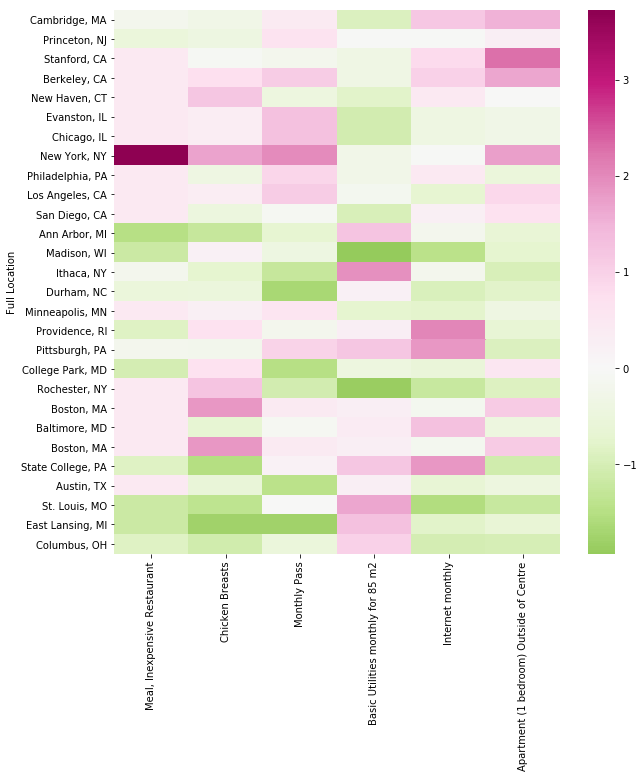

In [39]:
df_location_prices = df_location.set_index('Full Location')[['Meal, Inexpensive Restaurant', 'Chicken Breasts', 'Monthly Pass', 'Basic Utilities monthly for 85 m2', 'Internet monthly', 'Apartment (1 bedroom) Outside of Centre']]
df_lpn=(df_location_prices-df_location_prices.mean())/df_location_prices.std()
plt.subplots(figsize=(10,10))
prices_viz = sns.heatmap(data = df_lpn, 
                         cmap='PiYG_r', 
                         center=0)

А здесь мы делаем визуализацию оставшихся параметров. Чтобы зелененьким отображалось что-то хорошее, возьмем плохие переменные (например, количество преступлений) с минусом.

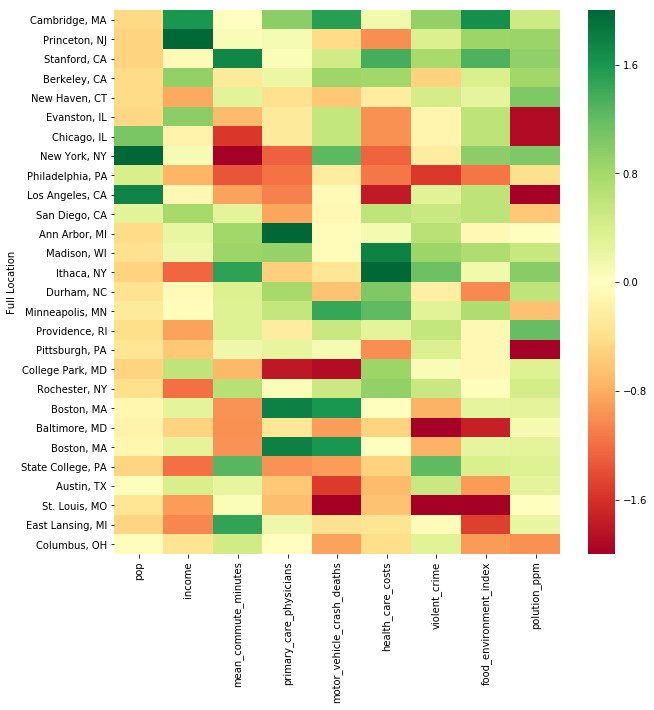

In [40]:
df_location_params = df_location.set_index('Full Location')[['pop', 'income', 'mean_commute_minutes', 'primary_care_physicians', 'motor_vehicle_crash_deaths', 'health_care_costs', 'violent_crime', 'food_environment_index', 'polution_ppm']]
df_lparamn=(df_location_params-df_location_params.mean())/df_location_params.std()
df_lparamn[['mean_commute_minutes', 'motor_vehicle_crash_deaths', 'health_care_costs', 'violent_crime', 'polution_ppm']] = -df_lparamn[['mean_commute_minutes', 'motor_vehicle_crash_deaths', 'health_care_costs', 'violent_crime', 'polution_ppm']]
plt.subplots(figsize=(10,10))
params_viz = sns.heatmap(data = df_lparamn, 
                         cmap='RdYlGn', 
                         center=0, 
                         vmax = 2, 
                         vmin=-2)

Сделаем индекс цен, используя функции numpy (!) и построим соответствующий график. Будем считать, что мы в месяц едим 20 раза вне дома, 30 раз покупаем курицу (это такой индекс биг мака для всей продуктовой корзины у нас), все остальное по одному в месяц, а плата за удобства в квартире в два раза меньше.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

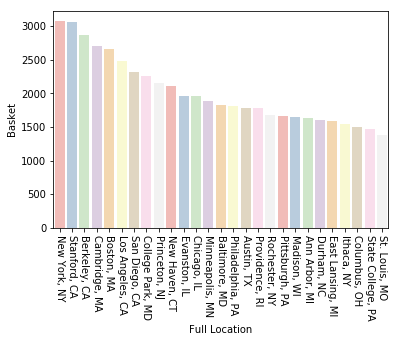

In [41]:
df_location['Basket'] = np.inner(df_location_prices, np.array([20, 30, 1, 0.5, 1, 1]))
basket_plot = sns.barplot(
    data= df_location[['Basket', 'Full Location']].sort_values(['Basket'], ascending = False),
    x= 'Full Location',
    y= 'Basket',
    palette = "Pastel1")
plt.xticks(rotation=-90)

Здесь мы взвешиваем оставшиеся параметры (с помощью математических возможностей!), чтобы составить некоторый произвольный индекс качества жизни. Самыми важными сделаем медианный доход и среднее время в пути до работы (жившие в общаге меня поймут).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

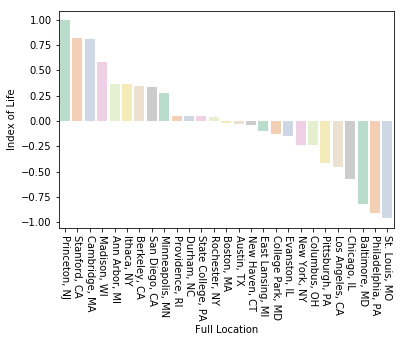

In [42]:
df_location['Index of Life'] = np.inner(df_lparamn, np.array([0.05, 0.25, 0.25, 0.03, 0.06, 0.07, 0.07, 0.11, 0.11]))
index_plot = sns.barplot(
    data= df_location[['Index of Life', 'Full Location']].sort_values(['Index of Life'], ascending=False),
    x= 'Full Location',
    y= 'Index of Life',
    palette = "Pastel2")
plt.xticks(rotation=-90)

## Часть 3. GREcat

Здесь мы готовимся к GRE — это обязательный экзамен, одна из частей которого — словарный тест. Придется вспомнить первый курс и заботать кучу слов. Но сначала надо их спарсить. Этот сайт иногда не работает, если так случилось и с вами, попробуйте немного подождать и может он заработает. После парсинга мы устроим небольшой интерактивчик с рандомными котами. Напоминание: для него нужно будет запустить все ячейки начиная со следующей (и самую первую с импортами, если вы этого еще не сделали). Ну или можете просто посмотреть, как этот интерактивчик выглядит 

In [43]:
r_gre = requests.get('https://gre.economist.com/gre-advice/gre-vocabulary/which-words-study/most-common-gre-vocabulary-list-organized-difficulty')
soup_gre = BeautifulSoup(r_gre.text, 'lxml').find('div', class_='article-body wysiwyg')
list_words = []
for p in soup_gre.find_all('p')[2:]:
    if p.contents[0].name == 'a':
        dict_word = {'Word': p.contents[0].text,
                    'Definition': p.contents[1].lstrip(': '),
                    'Example': p.text[p.text.find('“')+1 :p.text.find('”')].replace('\xa0', ' ')}
    else:
        dict_word = {'Word': p.contents[0].split(': ')[0],
                    'Definition': p.contents[0].split(': ')[1],
                    'Example': p.text[p.text.find('“')+1 :p.text.find('”')].replace('\xa0', ' ')}
    list_words.append(dict_word)
    
df_gre = pd.DataFrame(list_words, columns = ['Word', 'Definition', 'Example'])

Здесь мы используем другие технологии — модуль работы с датами! Введите дату, к которой вы хотите выучить слова (лучше через два месяца и дальше, а то в следующей ячейке умереть можно)

In [45]:
from datetime import datetime
import math
def days_to_study(exam_date):
    today = datetime.today()
    someday = datetime.strptime(exam_date, "%d.%m.%y")
    diff = someday - today
    return diff.days
def words_in_a_day(days):
    print("Рекомендуемое количество слов в день: " + str(math.ceil(334 / days)))
exam_date = input('Когда вы хотите выучить слова? Введите дату в формате дд.мм.гг: ')
try:
    words_in_a_day(days_to_study(exam_date))
except ValueError:
    print("Не тот формат даты!")

Когда вы хотите выучить слова? Введите дату в формате дд.мм.гг: 25.08.19
Рекомендуемое количество слов в день: 3


А теперь лучшая часть этого проекта! Мы используем CATAAS API (да, это API!), чтобы генерировать рандомные фотографии котов, которые говорят рандомные слова из GRE. Затем введите что-нибудь, чтобы выдать определение — так вы можете и учить слова и проверять, хорошо ли вы их помните. Эта ячейка выдаст вам столько слов, сколько было рекомендовано в день в предыдущей ячейке. И да, мы выводим картинку, еще и в цикле! Это очень продвинутая другая технология :)

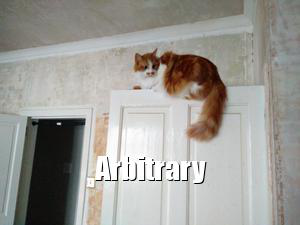

Write something here when you will be ready to get the definition: This is a Kevin's word!
adjective, Based on random choice or personal whim, rather than any reason or system
Is it the time for an example? I knew it
The prevailing belief among linguists had been that the sounds used to form those words were arbitrary.


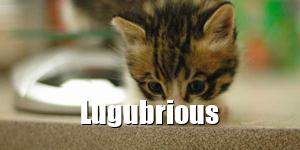

Write something here when you will be ready to get the definition: It is a new word...
adjective, Looking or sounding sad and dismal
Is it the time for an example? Yeah
The lugubrious strains of 'Heaven Knows I’m Miserable Now' waft across a sunny beach in Acapulco.


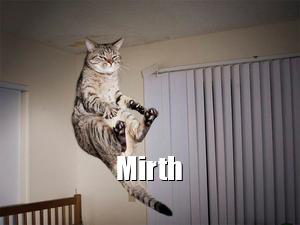

Write something here when you will be ready to get the definition: Give me the definition!
noun, Amusement, especially as expressed in laughter
Is it the time for an example? Nope, but whatever
A further proposal, to cut the salaries of senior public managers by 25%, has caused both anger and mirth.


In [46]:
import random
from PIL import Image
from io import BytesIO
from IPython.display import display
for k in range(math.ceil(334 / (days_to_study(exam_date)))):
    i = random.randrange(0, 333)
    cat = requests.get('https://cataas.com/cat/says/'+df_gre.at[i, 'Word']+'?type=sm')
    img = Image.open(BytesIO(cat.content))
    display(img)
    s1 = input('Write something here when you will be ready to get the definition: ')
    print(df_gre.at[i, 'Definition'])
    s1 = input('Is it the time for an example? ')
    print(df_gre.at[i, 'Example'])